# A/B-тестирование в интернет-магазине

Крупный интернет-магазин разрабатывает план расширения продаж. Совместно с отделом маркетинга мы подготовили список гипотез для увеличения выручки. Задачи настоящего исследования: 
1. Приоритизировать гипотезы с использованием фреймворков ICE и RICE;
2. Провести A/B-тест и проанализировать результаты: сравнить выручку, средний чек, конверсию, изучить наличие статистически значимых различий между группами.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Приоритизация гипотез</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-разделу" data-toc-modified-id="Вывод-по-разделу-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод по разделу</a></span></li></ul></li><li><span><a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ A/B-теста</a></span><ul class="toc-item"><li><span><a href="#Изучение-и-предобработка-данных" data-toc-modified-id="Изучение-и-предобработка-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изучение и предобработка данных</a></span></li><li><span><a href="#Кумулятивная-выручка-по-группам" data-toc-modified-id="Кумулятивная-выручка-по-группам-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Кумулятивная выручка по группам</a></span></li><li><span><a href="#Кумулятивный-средний-чек-по-группам" data-toc-modified-id="Кумулятивный-средний-чек-по-группам-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Кумулятивный средний чек по группам</a></span></li><li><span><a href="#Кумулятивная-конверсия-по-группам" data-toc-modified-id="Кумулятивная-конверсия-по-группам-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Кумулятивная конверсия по группам</a></span></li><li><span><a href="#Анализ-выбросов-и-всплесков" data-toc-modified-id="Анализ-выбросов-и-всплесков-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Анализ выбросов и всплесков</a></span></li><li><span><a href="#Статистический-анализ-«сырых»-данных" data-toc-modified-id="Статистический-анализ-«сырых»-данных-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Статистический анализ «сырых» данных</a></span><ul class="toc-item"><li><span><a href="#Различия-в-конверсии-между-группами" data-toc-modified-id="Различия-в-конверсии-между-группами-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>Различия в конверсии между группами</a></span></li><li><span><a href="#Различия-в-среднем-чеке-заказа-между-группами" data-toc-modified-id="Различия-в-среднем-чеке-заказа-между-группами-2.6.2"><span class="toc-item-num">2.6.2&nbsp;&nbsp;</span>Различия в среднем чеке заказа между группами</a></span></li></ul></li><li><span><a href="#Статистический-анализ-«очищенных»-данных" data-toc-modified-id="Статистический-анализ-«очищенных»-данных-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Статистический анализ «очищенных» данных</a></span><ul class="toc-item"><li><span><a href="#Различия-в-конверсии-между-группами" data-toc-modified-id="Различия-в-конверсии-между-группами-2.7.1"><span class="toc-item-num">2.7.1&nbsp;&nbsp;</span>Различия в конверсии между группами</a></span></li><li><span><a href="#Различия-в-среднем-чеке-заказа-между-группами" data-toc-modified-id="Различия-в-среднем-чеке-заказа-между-группами-2.7.2"><span class="toc-item-num">2.7.2&nbsp;&nbsp;</span>Различия в среднем чеке заказа между группами</a></span></li></ul></li><li><span><a href="#Результат-A/B-теста" data-toc-modified-id="Результат-A/B-теста-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Результат A/B-теста</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

In [1]:
#импорт библиотек и настроек
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', -1)

In [2]:
#загрузка файлов
try:
    hypo = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    hypo = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

## Приоритизация гипотез

In [3]:
#выведем краткую сводку по датасету с гипотезами и саму таблицу
hypo.info()
display(hypo)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Таблица hypo содержит девять гипотез по увеличению выручки интернет-магазина. Для каждой гипотезы указаны параметры Reach (охват пользователей по 10-балльной шкале), Impact (влияние на пользователей по 10-балльной шкале), Confidence (уверенность в гипотезе по 10-балльной шкале) и Effort (затраты ресурсов на проверку гипотезы по 10-балльной шкале). Данные хранятся в оптимальных форматах, пропусков в таблице нет. Используем имеющуюся информацию для приоритизации гипотез.

In [4]:
#применим фреймворк ICE для приоритизации гипотез
hypo['ICE'] = round(hypo['Impact'] * hypo['Confidence'] / hypo['Efforts'], 2)

In [5]:
#выведем результат, отсортировав гипотезы по убыванию приоритета
hypo[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективная гипотеза по ICE - №9: "Запустить акцию, дающую скидку на товар в день рождения". На втором месте добавление двух новых каналов привлечения трафика, на третьем - сбор базы клиентов для email-рассылок через форму подписки. 8 баллов набрала идея показать на главной странице баннеры с актуальными акциями и распродажами, 7 баллов у добавления блоков рекомендаций товаров на сайт. Оставшиеся четыре гипотезы набрали не больше 2 баллов.

In [6]:
#применим фреймворк RICE для приоритизации гипотез
hypo['RICE'] = (hypo['Reach'] * hypo['Impact'] * hypo['Confidence']) / hypo['Efforts']

In [7]:
#выведем результат, отсортировав гипотезы по убыванию приоритета
hypo[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


1. В результатах приоритизации по RICE с большим отрывом лидирует гипотеза №8: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", которая была на третьем месте при прошлом расчёте. Дело в том, что у этой гипотезы самый широкий охват пользователей - если добавить форму на все основные страницы, все посетители сайта так или иначе её заметят.
2. На втором месте идея добавить блоки рекомендаций товаров на сайт: по ICE она была на пятом месте, но у этой гипотезы тоже хороший охват - 8 из 10.
3. На третьем месте - добавление двух новых каналов привлечения трафика (вторая по перспективности гипотеза в фреймворке ICE, но охват у неё ограничен тридцатью процентами пользователей). 
4. Четвёртое место - баннеры с актуальными акциями и распродажами на главной странице сайта - в обоих фреймворках совпадает. 
5. На пятом месте по RICE скидка на товар в день рождения (самая перспективная гипотеза по ICE). У неё самый низкий охват аудитории, что неудивительно - день рождения, как известно, у каждого пользователя сайта бывает только раз в году. 
6. Ещё четыре гипотезы распределились на 6-9 местах немного в ином порядке по сравнению с прошлым расчётом (2,6,4,5 по ICE, 4,2,6,5 по RICE), но всё ещё остаются малоперспективными.

### Вывод по разделу

Согласно фреймворку RICE, самой перспективной является гипотеза №8: добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. Её охват - 10/10, влияние на пользователей - 7/10, уверенность в гипотезе - 8/10,  затраты ресурсов на проверку гипотезы - 5/10.

## Анализ A/B-теста

### Изучение и предобработка данных

Мы получили данные по результатам проведенного тестирования.

In [8]:
#выведем краткую сводку и случайные 5 строк из первого датасета
orders.info()
orders.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
23,4252514150,351125977,2019-08-15,15185,B
528,1543948528,492739583,2019-08-19,750,A
134,62794304,199603092,2019-08-22,6976,A
527,1570513684,2837914161,2019-08-19,33405,B
924,3778001764,47206413,2019-08-10,730,B


В таблице orders содержится информация о заказах: transactionId - идентификатор заказа; visitorId - идентификатор пользователя, совершившего заказ; date - дата, когда был совершён заказ; revenue - выручка заказа; group - группа A/B-теста, в которую попал заказ.

In [9]:
#проверим наличие дубликатов
orders.duplicated().sum()

0

In [10]:
#изменим формат в столбце с датами
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

In [11]:
#проверим временной период A/B-теста
orders['date'].agg(['min', 'max'])

min   2019-08-01
max   2019-08-31
Name: date, dtype: datetime64[ns]

Тестирование проводилось с 1 по 31 августа 2019 года.

In [12]:
#проверим распределение данных по группам
orders.groupby('group').agg({'visitorId':'nunique', 'transactionId':'nunique'})

,visitorId,transactionId
group,,
A,503,557
B,586,640


В группе Б и количество уникальных посетителей, и количество заказов выше - на первый взгляд, тестируемое нововведение дало эффект. Проверим выборку на корректность распределения пользователей по группам.

In [13]:
orders['visitorId'].nunique()

1031

Число уникальных посетителей во всей выборке (1031) меньше, чем суммарное число уникальных посетителей по группам (1089), то есть 58 человек одновременно попали в обе группы теста. Для достоверности результатов удалим заказы этих пользователей.

In [14]:
#создадим список visitorId, попавших в обе группы
flickers = orders.groupby('visitorId')['group'].nunique().where(lambda x : x!=1).dropna().index

In [15]:
#удалим эти visitorId из датафрейма
orders = orders[np.logical_not(orders['visitorId'].isin(flickers))]

In [16]:
#проверим результат
orders['visitorId'].nunique()

973

In [17]:
orders.groupby('group').agg({'visitorId':'nunique', 'transactionId':'nunique'})

,visitorId,transactionId
group,,
A,445,468
B,528,548


После удаления неуникальных посетителей группа B всё ещё показывает лучшие результаты, чем группа А. 

In [18]:
#выведем краткую сводку и случайные 5 строк из второго датасета
visitors.info()
visitors.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
10,2019-08-11,A,718
17,2019-08-18,A,668
25,2019-08-26,A,722
4,2019-08-05,A,756
3,2019-08-04,A,717


Таблица visitors состоит из трёх колонок: дата; группа A/B-теста; количество пользователей в указанную дату в указанной группе A/B-теста.

In [19]:
#проверим наличие дубликатов
visitors.duplicated().sum()

0

In [20]:
#изменим формат в столбце с датами
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [21]:
#проверим совпадение периодов в двух датасетах
visitors['date'].agg(['min', 'max'])

min   2019-08-01
max   2019-08-31
Name: date, dtype: datetime64[ns]

In [22]:
#проверим распределение данных по группам
visitors.groupby('group').agg({'visitors':'count'})

,visitors
group,
A,31
B,31


Данные готовы для анализа.

### Кумулятивная выручка по группам

In [23]:
#создадим массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [24]:
#получим агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(
        orders['date'] <= x['date'], orders['group'] == x['group'])]
        .agg({'date' : 'max', 
        'group' : 'max', 
        'transactionId' : pd.Series.nunique, 
        'visitorId' : pd.Series.nunique, 
        'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [25]:
#получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(
        visitors['date'] <= x['date'], visitors['group'] == x['group'])]
        .agg({'date' : 'max', 
        'group' : 'max', 
        'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [26]:
#объединим полученные данные в один датафрейм
cumulativeData = ordersAggregated.merge(visitorsAggregated, 
                                  left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData['date'] = cumulativeData['date'].dt.strftime('%d')

In [27]:
#выделим данные по выручке в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date', 'revenue', 'orders']]

In [28]:
#выделим данные по выручке в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

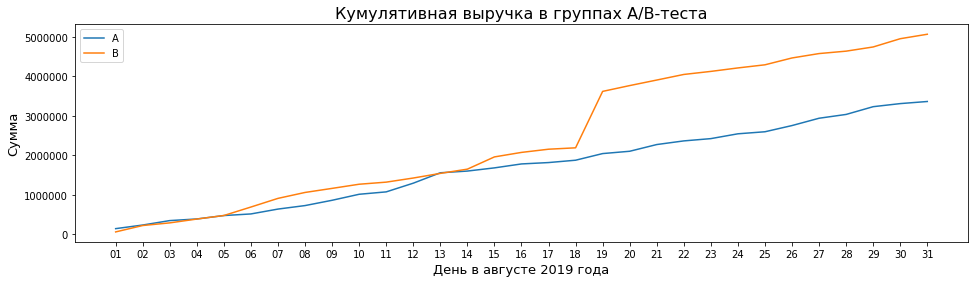

In [29]:
#построим график
plt.figure(figsize=(16, 4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('Кумулятивная выручка в группах A/B-теста', fontsize=16)
plt.xlabel('День в августе 2019 года', fontsize=13)
plt.ylabel('Сумма', fontsize=13);

Начиная с пятого дня эксперимента, выручка в группе В немного опережает выручку группы А, но в целом график показывает более-менее равномерный темп роста выручки в обеих группах. Однако группа B резко вырывается вперёд 19 августа за счёт прибавки почти 143 тысяч у.е. к кумулятивной выручке: возможно, в этот день было сделано несколько очень дорогих заказов.

### Кумулятивный средний чек по группам

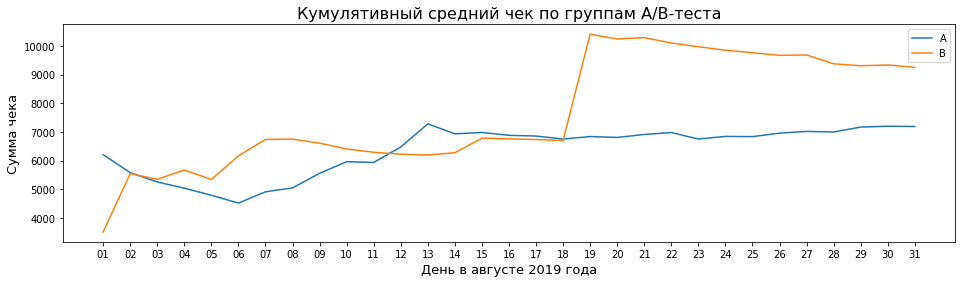

In [30]:
plt.figure(figsize=(16, 4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('Кумулятивный средний чек по группам A/B-теста', fontsize=16)
plt.xlabel('День в августе 2019 года', fontsize=13)
plt.ylabel('Сумма чека', fontsize=13);

Величина среднего чека в группе А установилась на 14 день тестирования и составляет около 7 тыс. у.е., значения за весь месяц колебались от 4,5 до 7,3 тыс. у.е. График среднего чека по группе В флуктуирует намного сильнее: от 3,5 до 10,5 тыс. у.е., резкий всплеск отмечен 19 августа, как и на прошлом графике, что подтверждает предположение о наличии очень дорогих заказов в выборке. Построим график относительного различия для среднего чека.

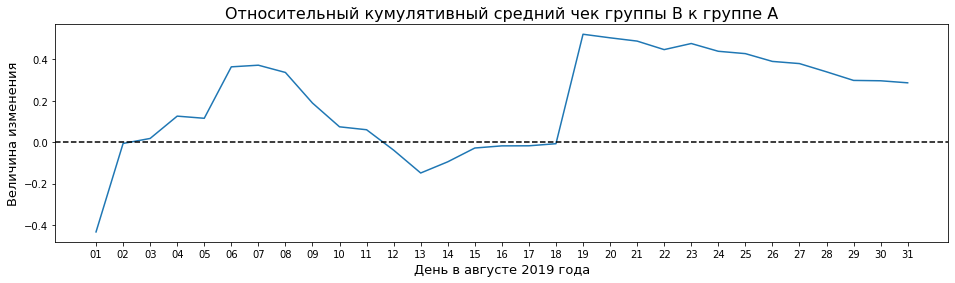

In [31]:
mergedRev = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', 
                                                   how='left', suffixes=['A', 'B'])
plt.figure(figsize=(16, 4))
plt.plot(mergedRev['date'], 
        (mergedRev['revenueB']/mergedRev['ordersB'])/(mergedRev['revenueA']/mergedRev['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительный кумулятивный средний чек группы B к группе A', fontsize=16)
plt.xlabel('День в августе 2019 года', fontsize=13)
plt.ylabel('Величина изменения', fontsize=13);

Результаты теста значительно менялись 6, 13 и 19 августа. Очевидно, в эти даты были совершены аномальные заказы.

### Кумулятивная конверсия по группам

In [32]:
#посчитаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [33]:
#выделим данные по группам
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

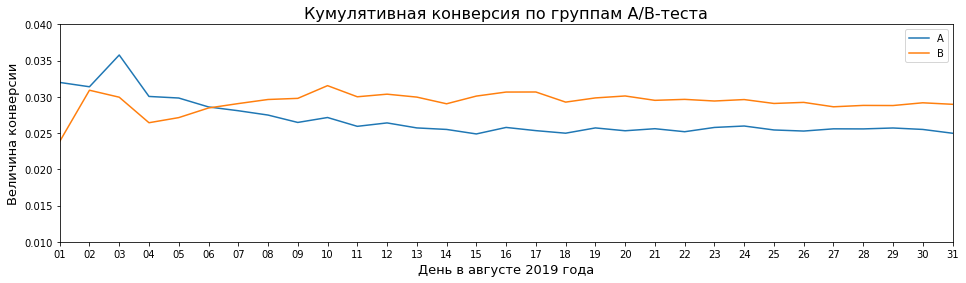

In [34]:
#построим график
plt.figure(figsize=(16, 4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.axis(['01', '31', 0.01, 0.04])
plt.title('Кумулятивная конверсия по группам A/B-теста', fontsize=16)
plt.xlabel('День в августе 2019 года', fontsize=13)
plt.ylabel('Величина конверсии', fontsize=13);

До 5 августа конверсия в группе А была выше, 6 августа два графика сошлись в одной точке, затем группы поменялись местами: конверсия группы B вырвалась вперёд и зафиксировалась около 0.029, а конверсия группы А просела и также зафиксировалась около 0.025. Построим график относительного изменения кумулятивной конверсии группы B к группе A.

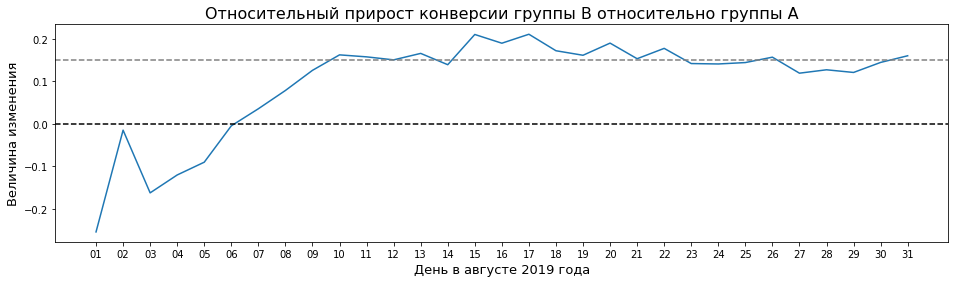

In [35]:
mergedCon = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                            left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(16, 4))
plt.plot(mergedCon['date'], mergedCon['conversionB']/mergedCon['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('Относительный прирост конверсии группы B относительно группы A', fontsize=16)
plt.xlabel('День в августе 2019 года', fontsize=13)
plt.ylabel('Величина изменения', fontsize=13);

График относительной конверсии демонстрирует ту же тенденцию, что и общий кумулятивный: до 6 августа группа B проигрывала группе A, затем вырвалась вперёд. В целом отношение конверсии установилось около 15% прироста, однако стоит проанализировать аномальные заказы перед тем, как делать выводы.

### Анализ выбросов и всплесков

Проанализируем значения количества заказов на наличие аномалий.

In [36]:
#посчитаем количество заказов по пользователям
ordersByUsers = (orders.drop(['group', 'revenue', 'date'], axis=1)
                .groupby('visitorId', as_index=False)
                .agg({'transactionId': pd.Series.nunique}))
ordersByUsers.columns = ['visitorId', 'orders']

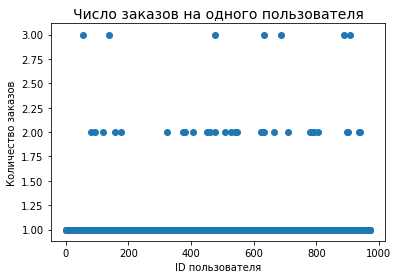

In [37]:
#построим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Число заказов на одного пользователя', fontsize=14)
plt.xlabel('ID пользователя')
plt.ylabel('Количество заказов');

Большинство пользователей сделали по одному заказу, есть также те, кто сделал два заказа. Три заказа сделали единичные посетители. Посчитаем выборочные перцентили количества заказов на одного пользователя.

In [38]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

95% пользователей оформили один заказ. Всего 1% пользователей сделали больше двух заказов. Примем число 2 за границу для определения аномальных пользователей.

Теперь проанализируем значения стоимости заказов на наличие аномалий.

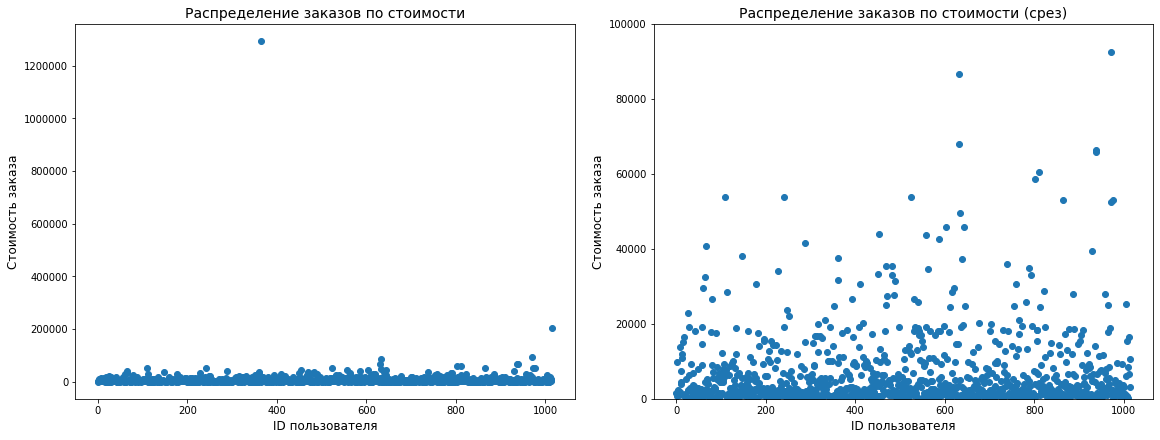

In [39]:
#построим точечную диаграмму стоимости заказов
fig, axes = plt.subplots(1, 2, figsize=(16,6), constrained_layout=True)
x_values = pd.Series(range(0,len(orders['revenue'])))

axes[0].scatter(x_values, orders['revenue'])
axes[0].set_title('Распределение заказов по стоимости', fontsize=14)
axes[0].set_xlabel('ID пользователя', fontsize=12)
axes[0].set_ylabel('Стоимость заказа', fontsize=12)

#увеличим масштаб для наглядности
axes[1].scatter(x_values, orders['revenue'])
axes[1].set_title('Распределение заказов по стоимости (срез)', fontsize=14)
axes[1].set_xlabel('ID пользователя', fontsize=12)
axes[1].set_ylabel('Стоимость заказа', fontsize=12)
axes[1].set_ylim(0, 100000);

Стоимость большинства заказов не превышает 100 тыс. у.е. (при увеличении масштаба видно, что большая часть точек на диаграмме находится в пределах 20000). Выделяются две аномальные точки - заказ на 200 тыс. и дороже 1,2 млн. Посмотрим, что это за заказы.

In [40]:
orders.sort_values('revenue', ascending=False).head()

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A


Оба заказа дороже 100 тыс. относятся к группе B. Самый дорогой заказ на 1294500 у.е. был совершён 19 августа - очевидно, это он вызвал резкий подъём на графиках кумулятивной выручки и среднего чека в группе B. Для точности расчётов стоит удалить его из выборки. Посчитаем границу стоимости аномальных заказов.

In [41]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Стоимость 95% заказов не превышает 27 тыс., и всего 1% заказов стоил дороже 53904 у.е. Примем это значение в качестве границы аномальных заказов.

### Статистический анализ «сырых» данных

Сначала посчитаем статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей. Подготовим данные для статистического анализа.

In [42]:
#посчитаем количество пользователей в выбранную дату в группе A
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [43]:
#посчитаем количество пользователей до выбранной даты включительно в группе A
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}), axis=1, )
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [44]:
#посчитаем количество пользователей в выбранную дату в группе В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [45]:
#посчитаем количество пользователей до выбранной даты включительно в группе В
visitorsBCummulative = visitorsBDaily.apply(
        lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
            {'date': 'max', 'visitorsPerDateB': 'sum'}), axis=1, )
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [46]:
#количество заказов и суммарная выручка в выбранную дату в группе A
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [47]:
#суммарное число заказов и суммарная выручка до выбранной даты включительно в группе A
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}), axis=1, 
        ).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

In [48]:
#количество заказов и суммарная выручка в выбранную дату в группе В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [49]:
#суммарное число заказов и суммарная выручка до выбранной даты включительно в группе В
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}), axis=1,
        ).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [50]:
#объединим все полученные данные в датафрейм
data = (ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head())

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Можно приступать к расчёту статистической значимости.

#### Различия в конверсии между группами

In [51]:
#посчитаем число совершённых заказов для пользователей, которые заказывали хотя бы 1 раз
ordersByUsersA = (orders[orders['group'] == 'A'].groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (orders[orders['group'] == 'B'].groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.columns = ['visitorId', 'orders']

In [52]:
#создадим список из заказов каждого пользователя из группы А (в том числе тех, кто ничего не заказал)
sampleA = pd.concat([ordersByUsersA['orders'],
                pd.Series(0, 
                index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                name='orders')], axis=0)

In [53]:
#создадим список из заказов каждого пользователя из группы B (в том числе тех, кто ничего не заказал)
sampleB = pd.concat([ordersByUsersB['orders'],
                pd.Series(0, 
                index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                name='orders')], axis=0)

Проверим различия в конверсии двух групп по критерию Манна-Уитни. Нулевая гипотеза: различий в конверсии между двумя выборками нет. Альтернативная гипотеза: конверсии двух выборок различаются. Дополнительно вычислим относительный прирост конверсии группы B по формуле "конверсия группы B / конверсия группы A - 1". 

In [54]:
alpha = 0.05 #зададим уровень статистической значимости

In [55]:
display('P-value: {0:.3f}'.format(st.mannwhitneyu(sampleA, sampleB, True, 'two-sided')[1]))
display('Относительный прирост конверсии группы B: {0:.2%}'.format(sampleB.mean() / sampleA.mean() - 1))

'P-value: 0.011'

'Относительный прирост конверсии группы B: 15.98%'

P-value по результатам теста Манна-Уитни намного ниже уровня статистической значимости, следовательно, отвергаем нулевую гипотезу: значимые различия в конверсии двух выборок есть. Относительный прирост конверсии группы B к конверсии группы А составляет почти 16%, то есть по «сырым» данным в группе В больше пользователей совершили хотя бы один заказ.

#### Различия в среднем чеке заказа между группами

Посчитаем статистическую значимость различий в среднем чеке заказа между группами. Нулевая гипотеза для теста Манна-Уитни: величина среднего чека в двух выборках одинакова. Альтернативная гипотеза: величина среднего чека в двух выборках значимо отличается.

In [56]:
display('P-value: {0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                  orders[orders['group']=='B']['revenue'], True, 'two-sided')[1]))
display('Относительный прирост среднего чека группы B: {0:.2%}'.format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

'P-value: 0.829'

'Относительный прирост среднего чека группы B: 28.66%'

P-value значительно больше 0,05, следовательно, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Однако средний чек группы B значительно больше среднего чека группы A: относительный прирост по «сырым» данным составляет 28,66%. Это очевидное влияние выбросов, которые мы обнаружили ранее. Очистим данные от аномальных значений и проведём повторные тесты для сравнения.

### Статистический анализ «очищенных» данных

За аномальных пользователей примем тех, кто совершил более 2 заказов или совершил заказ дороже 53904 у.е. Так мы уберём 1% пользователей с наибольшим числом заказов и 1% пользователей с дорогими заказами.

In [57]:
#получим список пользователей с наибольшим числом заказов
usersWithManyOrders = pd.concat(
            [ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], 
             ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis=0)

In [58]:
#получим список пользователей с аномально дорогими заказами
usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitorId']

In [59]:
#объединим их в таблице abnormalUsers
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0
                          ).drop_duplicates().sort_values())

In [60]:
#узнаем общее число аномальных пользователей
abnormalUsers.shape[0]

16

Всего 16 аномальных пользователей. Узнаем, как их действия повлияли на результаты теста.

#### Различия в конверсии между группами

In [61]:
#удалим аномальных пользователей из группы А
sampleAFiltered = pd.concat(
        [ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
        ), name='orders')], axis=0)

In [62]:
#удалим аномальных пользователей из группы В
sampleBFiltered = pd.concat(
        [ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
        ), name='orders')], axis=0)

In [63]:
display('P-value: {0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered, True, 'two-sided')[1]))
display('Относительный прирост конверсии группы B: {0:.2%}'
        .format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

'P-value: 0.007'

'Относительный прирост конверсии группы B: 18.92%'

P-value теста на «очищенных» данных снова намного ниже уровня статистической значимости. Можно уверенно говорить о наличии значимых различий в конверсии между двумя группами. Относительный прирост конверсии группы B к конверсии группы А после фильтрации аномалий немного увеличился и составляет 19%.

#### Различия в среднем чеке заказа между группами

In [64]:
display('P-value: {0:.3f}'.format(st.mannwhitneyu(
        orders[np.logical_and(orders['group'] == 'A', 
               np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
        orders[np.logical_and(orders['group'] == 'B',
               np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], 
               True, 'two-sided')[1]))

display('Относительный прирост среднего чека группы B: {0:.2%}'.format(
        orders[np.logical_and(orders['group'] == 'B',
               np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() /
        orders[np.logical_and(orders['group'] == 'A',
               np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1 ))

'P-value: 0.788'

'Относительный прирост среднего чека группы B: -3.23%'

P-value снова значительно больше 0,05, следовательно, статистически значимого различия по среднему чеку между группами нет. Относительный прирост среднего чека группы B по данным после фильтрации аномалий стал отрицательным, в целом разница между группами небольшая - 3%.

### Результат A/B-теста

По результатам проведенного теста выделим следующие факты:
1. Как по «сырым», так и по данным после фильтрации аномалий тест Манна-Уитни показывает наличие статистически значимого различия по конверсии между группами.
2. График различия конверсии показывает, что результаты группы B стабильно лучше группы А: в среднем на 15% с десятого дня эксперимента. Относительный прирост конверсии группы B после фильтрации аномалий составляет 19%.
3. Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.

Исходя из обнаруженных фактов, тест можно остановить, зафиксировав победу группы B. Тестируемое на этой группе пользователей нововведение позволило значительно увеличить конверсию, следовательно, и выручку интернет-магазина. Также в группе В было зафиксировано два самых дорогих заказа, которые тоже могут быть косвенно связаны с проводимым экспериментом.

## Общий вывод

**Приоритизация гипотез**

Перед проведением A/B-теста был подготовлен список из девяти гипотез по увеличению выручки интернет-магазина. Мы приоритизировали данные гипотезы с использованием фреймворков ICE и RICE и получили следующие результаты:
1. Топ-3 гипотез по ICE:
    - №9 "Запустить акцию, дающую скидку на товар в день рождения" (16,2 баллов); 
    - №1 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" (13,3 баллов); и 
    - №8 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" (11,2 баллов).
2. Топ-3 гипотез по RICE:
    - №8 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" (112 баллов);
    - №3 "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" (56 баллов); и
    - №1 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" (40 баллов).
3. Разница в результатах вызвана параметром Reach (охват пользователей по 10-балльной шкале). У гипотезы №8 он самый широкий - если добавить форму на все основные страницы, все посетители сайта её заметят. А вот день рождения у каждого пользователя сайта бывает только раз в год, поэтому охват аудитории у этой идеи самый низкий и в приоритизации по RICE она находится на пятом месте.

**Анализ A/B-теста**

По результатам проведенного A/B-теста мы получили информацию о заказах и пользователях, которые их совершали. Эксперимент проводился с 1 по 31 августа 2019 года, пользователи были поделены на две группы - А и В. Мы обнаружили 58 человек, которые одновременно попали в обе группы теста, и перед анализом результатов удалили этих пользователей из выборки. Изучение данных принесло следующие результаты:
1. График кумулятивной выручки по группам показал равномерный темп роста выручки в обеих группах, за исключением резкого всплеска в группе В 19 августа 2019 года, когда был сделан аномально дорогой заказ на 1294500 у.е. 
2. По той же причине всплеск в группе В был зафиксирован на графике, показывающем кумулятивный средний чек по группам. Значения среднего чека в группе В колебались от 3,5 до 10,5 тыс. у.е., к концу периода наблюдается тенденция к снижению. Величина среднего чека в группе А с 14 августа установилась на значении около 7 тыс. у.е.
3. Кумулятивная конверсия группы B зафиксировалась около 0.029, конверсия группы А - около 0.025. График относительного прироста конверсии показывает, что с десятого дня эксперимента результаты группы B лучше группы А в среднем на 15%. 
4. 95% пользователей оформили один заказ. 1% пользователей сделали больше двух заказов. За аномальных пользователей были приняты те, кто совершил более 2 заказов.
5. Стоимость 95% заказов не превысила 27 тыс. у.е., 1% заказов стоил дороже 53904 у.е. За аномальных пользователей были приняты те, кто совершил заказ дороже 53904 у.е.
6. Есть статистически значимое различие по конверсии между группами. Относительный прирост конверсии группы B к конверсии группы А по «сырым» данным составил 16%, после фильтрации аномалий - 19%.
7. Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.
8. Исходя из обнаруженных фактов, тест решено остановить, зафиксировав победу группы B. Тестируемое на группе В нововведение позволило значительно увеличить конверсию посещения в покупку, а значит, и выручку интернет-магазина.